# Day 4 : Data Loading and Manipulation and Visulatiozation

### You can use the following liberaries for your assignment:
> Numpy, Pandas, Matplotlib, seaborn, LASIO, Welly

## Kindly load the las file of Exported.csv file from the data folder
## Perform the below Tasks:

>1. Investigate the component of the data file (number of columns , numbers of observations, Null values, normal statistics) 
2. plot the null values as bars
3. fill in null values using three different methods.
4. produce statistics of the different methods and plot them.
5. which method do you prefer?

In [2]:
!pip install wellpathpy

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import lasio
import welly

from IPython.display import display

In [7]:
F02 = lasio.read("C:/Users/HP/Documents/GitHub/GeoML-2.0/10DaysChallenge/Dutch_F3_Logs/F02-1_logs.las")
display(df)

In [8]:
df = F02.df()
df.head(7)

,RHOB,DT,GR,AI,AI_REL,PHIE
DEPTH,,,,,,
48.00,NaN,524.0485,NaN,3820257.00,-455.6956,NaN
48.15,NaN,524.0410,NaN,3820311.75,-455.6956,NaN
48.30,NaN,524.0336,NaN,3820366.25,-455.6956,NaN
48.45,NaN,524.0262,NaN,3820419.75,-455.6956,NaN
48.60,NaN,524.0190,NaN,3820472.25,-455.6956,NaN
48.75,NaN,524.0117,NaN,3820525.75,-455.6956,NaN
48.90,NaN,524.0042,NaN,3820580.00,-455.6956,NaN


In [12]:
df.shape

(9680, 6)

In [16]:
display('info',df.info())
display('normal statistics',df.describe())

<class 'pandas.core.frame.DataFrame'>
Float64Index: 9680 entries, 48.0 to 1499.8501
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RHOB    8253 non-null   float64
 1   DT      9680 non-null   float64
 2   GR      9666 non-null   float64
 3   AI      9680 non-null   float64
 4   AI_REL  9680 non-null   float64
 5   PHIE    4906 non-null   float64
dtypes: float64(6)
memory usage: 529.4 KB


'info'

None

'normal statistics'

,RHOB,DT,GR,AI,AI_REL,PHIE
count,8253.000000,9680.000000,9666.000000,9.680000e+03,9680.000000,4906.000000
mean,1975.091074,495.026839,46.613531,4.078518e+06,5193.728898,0.304522
std,294.677828,50.861145,23.484662,8.776878e+05,193455.679167,0.064282
min,1350.444700,368.114700,1.339200,2.035267e+06,-617319.750000,0.203900
25%,1812.400000,460.693600,23.527000,3.658766e+06,-95113.828100,0.257900
50%,2096.345000,505.393400,48.765250,3.953107e+06,2603.301500,0.283000
75%,2210.906000,521.642300,63.162950,4.782770e+06,93553.453100,0.339800
max,2346.629200,667.920800,129.177300,5.983779e+06,629867.000000,0.709000


In [18]:
display('Null values',df.isna())

'Null values'

,RHOB,DT,GR,AI,AI_REL,PHIE
DEPTH,,,,,,
48.0000,True,False,True,False,False,True
48.1500,True,False,True,False,False,True
48.3000,True,False,True,False,False,True
48.4500,True,False,True,False,False,True
48.6000,True,False,True,False,False,True
...,...,...,...,...,...,...
1499.2500,False,False,False,False,False,True
1499.4000,False,False,False,False,False,True
1499.5500,False,False,False,False,False,True


In [19]:
display('Null values',df.isna().sum())

'Null values'

RHOB      1427
DT           0
GR          14
AI           0
AI_REL       0
PHIE      4774
dtype: int64

In [21]:
display('Null values%',df.isna().sum()/ df.shape[0] *100)

'Null values%'

RHOB      14.741736
DT         0.000000
GR         0.144628
AI         0.000000
AI_REL     0.000000
PHIE      49.318182
dtype: float64

In [22]:
#Making 3 copies for three methods of filling null values
df_copy_a =df.copy()
df_copy_b =df.copy()
df_copy_c =df.copy()

In [23]:
#Method A: Filling Null values by linear interpolation
df_copy_a=df_copy_a.interpolate(method ='linear', limit_direction ='backward')
display('after filling nans',df_copy_a)

'after filling nans'

,RHOB,DT,GR,AI,AI_REL,PHIE
DEPTH,,,,,,
48.0000,1998.9065,524.0485,3.0703,3820257.00,-455.6956,0.4702
48.1500,1998.9065,524.0410,3.0703,3820311.75,-455.6956,0.4702
48.3000,1998.9065,524.0336,3.0703,3820366.25,-455.6956,0.4702
48.4500,1998.9065,524.0262,3.0703,3820419.75,-455.6956,0.4702
48.6000,1998.9065,524.0190,3.0703,3820472.25,-455.6956,0.4702
...,...,...,...,...,...,...
1499.2500,1787.5444,532.1727,27.6273,3359011.00,-239115.9375,NaN
1499.4000,1814.1691,534.8610,28.5281,3391772.00,-239115.9375,NaN
1499.5500,1861.6497,537.1902,28.5813,3465524.00,-239115.9375,NaN


In [25]:
#Method b: Dropping Null values
df_copy_b.dropna(inplace=True)
print('Dataframe after removing nans =',df_copy_b.shape)
print('=' *100)
print('This dataset has {0} rows and {1} columns'.format(df_copy_b.shape[0],df_copy_b.shape[1]))

Dataframe after removing nans = (4906, 6)
This dataset has 4906 rows and 6 columns


In [26]:
display('after removing nans',df_copy_b)
#Notices that it removed the entire rows that contained NANs

'after removing nans'

,RHOB,DT,GR,AI,AI_REL,PHIE
DEPTH,,,,,,
544.2000,1897.7505,521.8398,46.3490,3636762.00,188158.9844,0.4702
544.3500,1950.1143,519.4737,46.2888,3754059.75,188158.9844,0.4375
544.5000,1968.0576,518.0292,46.2888,3799134.75,188158.9844,0.4262
544.6500,1984.5618,525.4709,49.1604,3776786.25,188158.9844,0.4159
544.8000,1974.3237,537.0573,56.4415,3676511.00,188158.9844,0.4223
...,...,...,...,...,...,...
1279.3501,1994.3097,502.1868,114.1797,3971229.75,163143.7500,0.4098
1279.5000,1991.3125,500.5999,114.1797,3977871.25,163143.7500,0.4117
1279.6500,2010.7062,498.9934,113.0370,4029565.00,163143.7500,0.3996


In [36]:
#Method c: Fill in NAN values by mean value
df_copy_c=df.fillna(df.mean())
display('after filling nans with mean value',df_copy_c)

'after filling nans with mean value'

,RHOB,DT,GR,AI,AI_REL,PHIE
DEPTH,,,,,,
48.0000,1975.091074,524.0485,46.613531,3820257.00,-455.6956,0.304522
48.1500,1975.091074,524.0410,46.613531,3820311.75,-455.6956,0.304522
48.3000,1975.091074,524.0336,46.613531,3820366.25,-455.6956,0.304522
48.4500,1975.091074,524.0262,46.613531,3820419.75,-455.6956,0.304522
48.6000,1975.091074,524.0190,46.613531,3820472.25,-455.6956,0.304522
...,...,...,...,...,...,...
1499.2500,1787.544400,532.1727,27.627300,3359011.00,-239115.9375,0.304522
1499.4000,1814.169100,534.8610,28.528100,3391772.00,-239115.9375,0.304522
1499.5500,1861.649700,537.1902,28.581300,3465524.00,-239115.9375,0.304522


In [29]:
display('AFTER NANs INTERPOLATION',df_copy_a.describe())
display('AFTER NANS REMOVAL',df_copy_b.describe())
display('AFTER NANS REPLACEMENT BY MEAN VALUE',df_copy_c.describe())

'AFTER NANs INTERPOLATION'

,RHOB,DT,GR,AI,AI_REL,PHIE
count,9680.000000,9680.000000,9680.000000,9.680000e+03,9680.000000,8214.000000
mean,1978.601881,495.026839,46.550555,4.078518e+06,5193.728898,0.371245
std,272.220505,50.861145,23.525945,8.776878e+05,193455.679167,0.095243
min,1350.444700,368.114700,1.339200,2.035267e+06,-617319.750000,0.203900
25%,1884.516450,460.693600,23.417800,3.658766e+06,-95113.828100,0.271600
50%,2055.638900,505.393400,48.720550,3.953107e+06,2603.301500,0.356750
75%,2192.937475,521.642300,63.135475,4.782770e+06,93553.453100,0.470200
max,2346.629200,667.920800,129.177300,5.983779e+06,629867.000000,0.709000


'AFTER NANS REMOVAL'

,RHOB,DT,GR,AI,AI_REL,PHIE
count,4906.000000,4906.000000,4906.000000,4.906000e+03,4906.000000,4906.000000
mean,2155.948824,465.387235,60.724800,4.689328e+06,12306.922104,0.304522
std,110.901473,44.431661,15.915596,6.150367e+05,170707.221466,0.064282
min,1515.571300,368.114700,28.170500,2.567369e+06,-453036.312500,0.203900
25%,2103.774150,430.888100,49.218325,4.258841e+06,-88126.375000,0.257900
50%,2190.447900,462.271000,57.712050,4.772372e+06,17309.205100,0.283000
75%,2234.970650,495.231225,70.230100,5.157895e+06,108839.296900,0.339800
max,2346.629200,637.030500,129.177300,5.983779e+06,449544.593800,0.709000


'AFTER NANS REPLACEMENT BY MEAN VALUE'

,RHOB,DT,GR,AI,AI_REL,PHIE
count,9680.000000,9680.000000,9680.000000,9.680000e+03,9680.000000,9680.000000
mean,1975.091074,495.026839,46.613531,4.078518e+06,5193.728898,0.304522
std,272.089526,50.861145,23.467671,8.776878e+05,193455.679167,0.045761
min,1350.444700,368.114700,1.339200,2.035267e+06,-617319.750000,0.203900
25%,1884.516450,460.693600,23.562875,3.658766e+06,-95113.828100,0.281800
50%,2055.638900,505.393400,48.720550,3.953107e+06,2603.301500,0.304522
75%,2192.937475,521.642300,63.135475,4.782770e+06,93553.453100,0.304522
max,2346.629200,667.920800,129.177300,5.983779e+06,629867.000000,0.709000


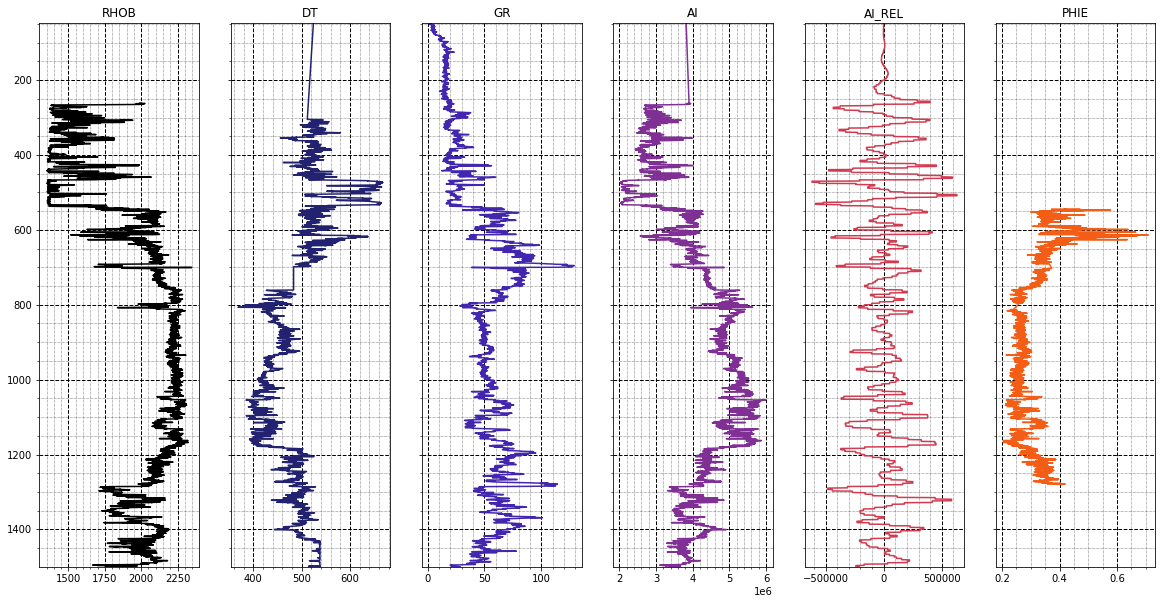

In [34]:
# original logs

rows, cols = 1, df.shape[1]

cmap = plt.cm.CMRmap
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20,10), sharey=True)
names = [ 'RHOB', 'DT', 'GR', 'AI', 'AI_REL', 'PHIE', 'MD', 'VP']
colrs = [ 'red', 'green', 'blue', 'orange', 'blue', 'black', 'green', 'violet']
for i in range(cols):
    ax[i].plot(df.iloc[:,i], df.index ,linewidth='1.5', color = cmap(i/9))
    ax[i].set_ylim(max(df.index), min(df.index))
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='dashed', linewidth='1', color='black')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black') #this is a comment
    ax[i].set_title('%s' %names[i])

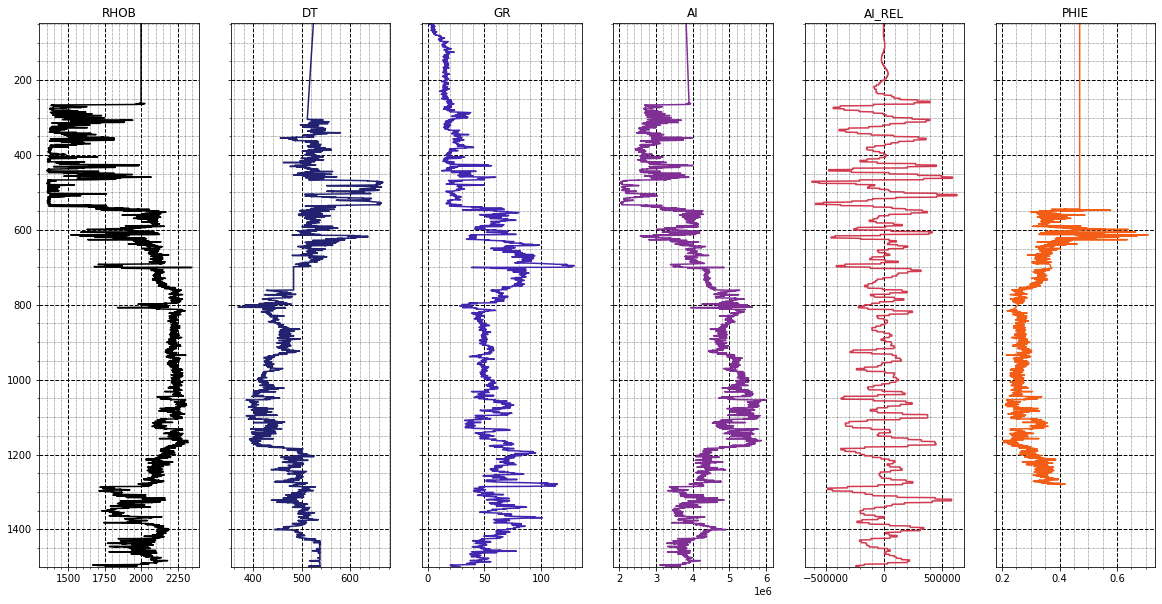

In [37]:
# LOGS AFTER NANs INTERPOLATION

rows, cols = 1, df.shape[1]

cmap = plt.cm.CMRmap
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20,10), sharey=True)
names = [ 'RHOB', 'DT', 'GR', 'AI', 'AI_REL', 'PHIE', 'MD', 'VP']
colrs = [ 'red', 'green', 'blue', 'orange', 'blue', 'black', 'green', 'violet']
for i in range(cols):
    ax[i].plot(df_copy_a.iloc[:,i], df_copy_a.index ,linewidth='1.5', color = cmap(i/9))
    ax[i].set_ylim(max(df_copy_a.index), min(df_copy_a.index))
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='dashed', linewidth='1', color='black')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black') #this is a comment
    ax[i].set_title('%s' %names[i])

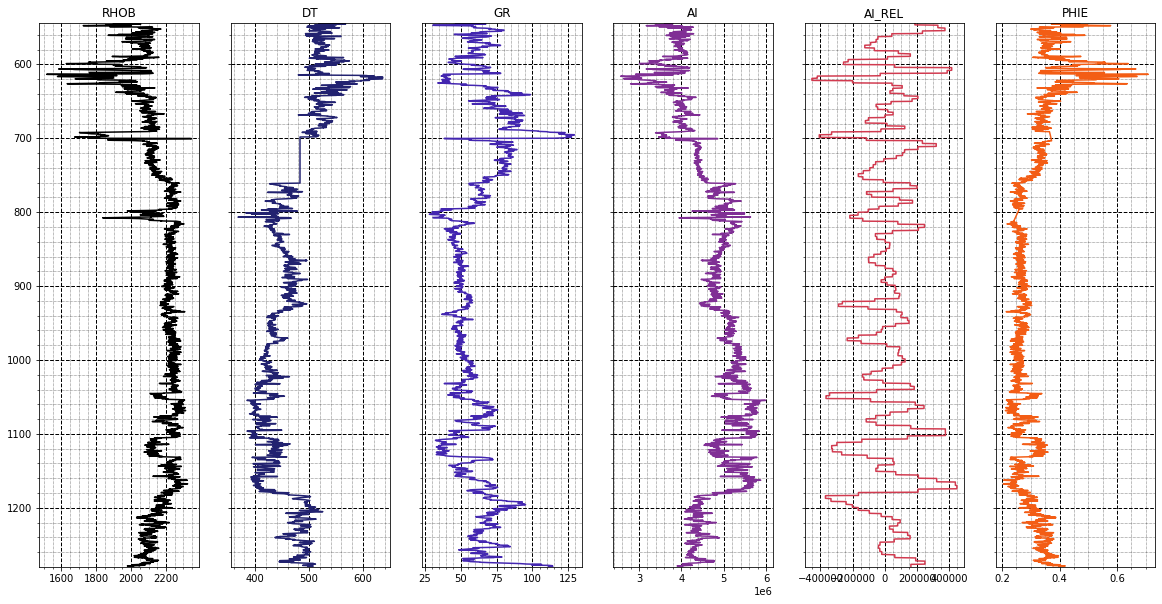

In [38]:
# LOGS AFTER DROPPING NANs

rows, cols = 1, df.shape[1]

cmap = plt.cm.CMRmap
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20,10), sharey=True)
names = [ 'RHOB', 'DT', 'GR', 'AI', 'AI_REL', 'PHIE', 'MD', 'VP']
colrs = [ 'red', 'green', 'blue', 'orange', 'blue', 'black', 'green', 'violet']
for i in range(cols):
    ax[i].plot(df_copy_b.iloc[:,i], df_copy_b.index ,linewidth='1.5', color = cmap(i/9))
    ax[i].set_ylim(max(df_copy_b.index), min(df_copy_b.index))
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='dashed', linewidth='1', color='black')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black') #this is a comment
    ax[i].set_title('%s' %names[i])

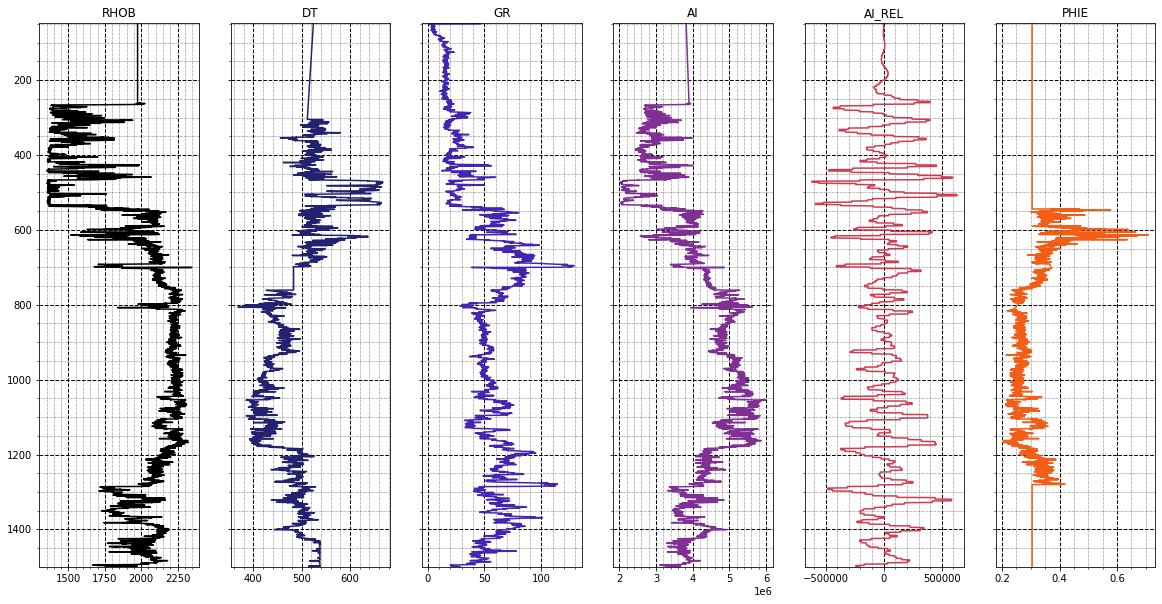

In [39]:
# LOGS AFTER NANS REPLACEMENT BY MEAN VALUE

rows, cols = 1, df.shape[1]

cmap = plt.cm.CMRmap
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20,10), sharey=True)
names = [ 'RHOB', 'DT', 'GR', 'AI', 'AI_REL', 'PHIE', 'MD', 'VP']
colrs = [ 'red', 'green', 'blue', 'orange', 'blue', 'black', 'green', 'violet']
for i in range(cols):
    ax[i].plot(df_copy_c.iloc[:,i], df_copy_c.index ,linewidth='1.5', color = cmap(i/9))
    ax[i].set_ylim(max(df_copy_c.index), min(df_copy_c.index))
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='dashed', linewidth='1', color='black')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    ax[i].set_title('%s' %names[i])

#Preferred Method: Interpolation